# Fetch Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
train = pd.read_csv("/Users/admin/Desktop/my computer/Vaibhav Sir/project/training_set.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Drop Unnecessary

In [4]:
for i in train.columns:
    print(i,len(train[i].unique()))

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 111
LotArea 1073
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 637
BsmtFinType2 7
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageYrBlt 98
GarageFinish 4
GarageCars 5
GarageArea 441
GarageQual 6
GarageCond 6
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 4
Fence 5
MiscFeature 5
MiscV

In [5]:
train = train.drop("Id",axis=1)

# Find and replace Missing Data

In [6]:
Q = pd.DataFrame(train.isna().sum(),columns=["CT"])
W = Q[Q.CT > 0].index
for i in W:
    if(train[i].dtypes == "object"):
        x = train[i].mode()[0]
        train[i] = train[i].fillna(x)
    else:
        x = train[i].mean()
        train[i] = train[i].fillna(x)
            

In [7]:
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

# Define X and Y

In [8]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [9]:
Y = train[["SalePrice"]]
X = train.drop("SalePrice",axis=1)


# Seperate cat and con

In [10]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

# Univariate

In [11]:
import numpy as np

In [12]:
X.skew().sort_values() > 0.7

GarageYrBlt      False
YearBuilt        False
YearRemodAdd     False
GarageCars       False
FullBath         False
YrSold           False
GarageArea       False
BedroomAbvGr     False
MoSold           False
OverallQual      False
BsmtFullBath     False
Fireplaces       False
HalfBath         False
TotRmsAbvGrd     False
OverallCond      False
2ndFlrSF          True
BsmtUnfSF         True
GrLivArea         True
1stFlrSF          True
MSSubClass        True
TotalBsmtSF       True
WoodDeckSF        True
BsmtFinSF1        True
OpenPorchSF       True
LotFrontage       True
MasVnrArea        True
EnclosedPorch     True
BsmtHalfBath      True
ScreenPorch       True
BsmtFinSF2        True
KitchenAbvGr      True
LowQualFinSF      True
3SsnPorch         True
LotArea           True
PoolArea          True
MiscVal           True
dtype: bool

In [13]:
cols_with_skew = ["2ndFlrSF","BsmtUnfSF","GrLivArea","1stFlrSF","MSSubClass","TotalBsmtSF","WoodDeckSF","BsmtFinSF1","OpenPorchSF","LotFrontage","MasVnrArea","EnclosedPorch","BsmtHalfBath","ScreenPorch","BsmtFinSF2","KitchenAbvGr","LowQualFinSF","3SsnPorch","LotArea","PoolArea","MiscVal"]

In [14]:
cols_with_skew

['2ndFlrSF',
 'BsmtUnfSF',
 'GrLivArea',
 '1stFlrSF',
 'MSSubClass',
 'TotalBsmtSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'OpenPorchSF',
 'LotFrontage',
 'MasVnrArea',
 'EnclosedPorch',
 'BsmtHalfBath',
 'ScreenPorch',
 'BsmtFinSF2',
 'KitchenAbvGr',
 'LowQualFinSF',
 '3SsnPorch',
 'LotArea',
 'PoolArea',
 'MiscVal']

# Bivariate

<AxesSubplot:>

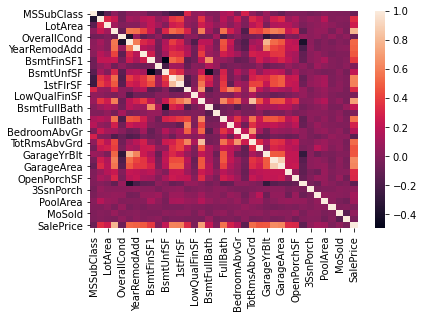

In [15]:
import seaborn as sb
sb.heatmap(train.corr())

In [16]:
imp_cols = list(train.corr()["SalePrice"].sort_values().index)[22:]
imp_cols.remove("SalePrice")

<AxesSubplot:>

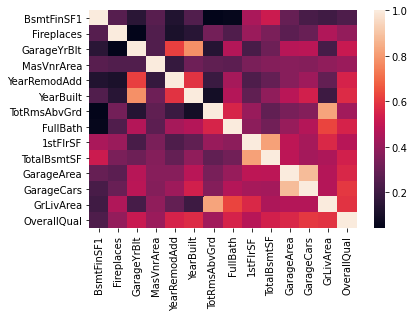

In [17]:
sb.heatmap(X[imp_cols].corr())

# Data Preparation

In [18]:
X1 = pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[imp_cols]),columns=imp_cols)
X = X2.join(X1)

# OLS model

In [19]:
X = X.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual', 'YearRemodAdd', 'MasVnrArea'],axis=1)

In [20]:
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     55.84
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:06:16   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.406e+04
Df Residuals:                    1242   BIC:                         3.521e+04
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.383e+04   2825.175      4.895      0.000    8287.794    1.94e+04
Fireplaces             4555.9032   1103.878      4.127      0.000    2390.231    6721.576
GarageYrBlt           -1429.4155   1518.316     -0.941      0.347   -4408.164    1549.333
YearBuilt              5324.4939   2457.116      2.167      0.030     503.938    1.01e+04
TotRmsAbvGrd           6405.1121   1480.792      4.325      0.000    3499.983    9310.242
FullBath               4095.1929   1209.863      3.385      0.001    1721.592    6468.794
1stFlrSF               1.735e+04   2234.869      7.761      0.000     1.3e+04    2.17e+04
TotalBsmtSF            7591.6972   1940.746      3.912      0.000    3784.194    1.14e+04
GarageArea             6393.2066   1883.705      3.394      0.001    2697.612    1.01e+04
GarageCars             2128.4762   1877.214      1.134      0.257   -1554.384    5811.336
MSZoning_C (all)      -3.578e+04   9176.634     -3.900      0.000   -5.38e+04   -1.78e+04
MSZoning_FV            1.848e+04   6812.143      2.713      0.007    5118.572    3.18e+04
MSZoning_RH            1.372e+04   6764.466      2.029      0.043     452.297     2.7e+04
MSZoning_RL            1.035e+04   3598.940      2.875      0.004    3285.499    1.74e+04
MSZoning_RM            7062.5015   4074.791      1.733      0.083    -931.733    1.51e+04
Street_Grvl            1223.6333   7127.780      0.172      0.864   -1.28e+04    1.52e+04
Street_Pave            1.261e+04   6557.310      1.923      0.055    -257.825    2.55e+04
Alley_Grvl             2865.8363   2962.446      0.967      0.334   -2946.116    8677.788
Alley_Pave             1.096e+04   3124.767      3.509      0.000    4834.196    1.71e+04
LotShape_IR1          -2895.8012   2957.101     -0.979      0.328   -8697.267    2905.664
LotShape_IR2           4014.3320   4263.580      0.942      0.347   -4350.282    1.24e+04
LotShape_IR3           1.451e+04   7419.914      1.956      0.051     -42.222    2.91e+04
LotShape_Reg          -1802.8211   3058.078     -0.590      0.556   -7802.391    4196.749
LandContour_Bnk         530.4429   3570.316      0.149      0.882   -6474.074    7534.960
LandContour_HLS        8583.4941   3675.164      2.336      0.020    1373.279    1.58e+04
LandContour_Low       -1737.1116   4690.638     -0.370      0.711   -1.09e+04    7465.338
LandContour_Lvl        6453.6112   2663.650      2.423      0.016    1227.860    1.17e+04
Utilities_AllPub       2.171e+04   1.39e+04      1.557      0.120   -5651.625    4.91e+04
Utilities_NoSeWa      -7881.7117   1.53e+04     -0.516      0.606   -3.79e+04    2.21e+04
LotConfig_Corner       7380.5390   3401.033      2.170      0.030     708.134    1.41e+04
LotConfig_CulDSac      1.584e+04   4003.508      3.957      0.000    7988.899    2.37e+04
LotConfig_FR2         -

In [21]:
model.pvalues.sort_values().index

Index(['RoofMatl_ClyTile', 'Neighborhood_NoRidge', 'BsmtExposure_Gd',
       'RoofMatl_WdShngl', 'BldgType_1Fam', 'KitchenQual_Ex', '1stFlrSF',
       'Neighborhood_StoneBr', 'BsmtQual_Ex', 'Condition2_PosN',
       ...
       'Functional_Maj1', 'Exterior2nd_Other', 'Heating_Floor',
       'RoofStyle_Mansard', 'Condition2_Artery', 'BldgType_TwnhsE',
       'PavedDrive_P', 'Condition1_RRNe', 'HouseStyle_1.5Unf',
       'Exterior1st_AsphShn'],
      dtype='object', length=262)

In [22]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
Q[Q.Pval > 0.9].index

Index(['Condition1_RRNe', 'Condition2_Artery', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'Exterior1st_AsphShn',
       'Exterior2nd_Other', 'Heating_Floor', 'PavedDrive_P'],
      dtype='object')

In [23]:
Q[Q.Pval > 0.9]

,Pval
Condition1_RRNe,0.961
Condition2_Artery,0.949
BldgType_TwnhsE,0.951
HouseStyle_1.5Unf,0.962
RoofStyle_Mansard,0.945
Exterior1st_AsphShn,0.973
Exterior2nd_Other,0.938
Heating_Floor,0.943
PavedDrive_P,0.958


In [24]:
X = X.drop(['Condition1_RRNe', 'Condition2_Artery', 'BldgType_TwnhsE','HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'Exterior1st_AsphShn','Exterior2nd_AsbShng', 'Exterior2nd_Other', 'BsmtCond_Fa','Heating_Floor', 'Heating_OthW', 'Functional_Maj1', 'PavedDrive_P'],axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     56.45
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:06:17   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.405e+04
Df Residuals:                    1244   BIC:                         3.519e+04
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.353e+04   6998.528      1.933      0.053    -203.892    2.73e+04
Fireplaces             4556.9319   1102.947      4.132      0.000    2393.089    6720.774
GarageYrBlt           -1407.1132   1507.788     -0.933      0.351   -4365.202    1550.976
YearBuilt              5289.1678   2442.148      2.166      0.031     497.984    1.01e+04
TotRmsAbvGrd           6408.9299   1479.352      4.332      0.000    3506.629    9311.231
FullBath               4091.4509   1208.461      3.386      0.001    1720.603    6462.298
1stFlrSF               1.734e+04   2232.426      7.768      0.000     1.3e+04    2.17e+04
TotalBsmtSF            7606.0730   1935.669      3.929      0.000    3808.537    1.14e+04
GarageArea             6392.2421   1881.936      3.397      0.001    2700.123    1.01e+04
GarageCars             2128.2634   1875.040      1.135      0.257   -1550.327    5806.854
MSZoning_C (all)      -3.583e+04   9258.054     -3.871      0.000    -5.4e+04   -1.77e+04
MSZoning_FV            1.839e+04   6930.771      2.653      0.008    4789.795     3.2e+04
MSZoning_RH            1.366e+04   6877.100      1.986      0.047     163.016    2.71e+04
MSZoning_RL            1.028e+04   3819.683      2.691      0.007    2784.636    1.78e+04
MSZoning_RM            7039.4838   4232.376      1.663      0.097   -1263.900    1.53e+04
Street_Grvl            1091.9149   7824.532      0.140      0.889   -1.43e+04    1.64e+04
Street_Pave            1.243e+04   7272.520      1.710      0.088   -1833.345    2.67e+04
Alley_Grvl             2670.8018   4404.486      0.606      0.544   -5970.240    1.13e+04
Alley_Pave             1.086e+04   4406.654      2.463      0.014    2210.233    1.95e+04
LotShape_IR1          -2977.7646   3364.686     -0.885      0.376   -9578.850    3623.321
LotShape_IR2           3935.6725   4574.016      0.860      0.390   -5037.965    1.29e+04
LotShape_IR3           1.444e+04   7559.118      1.910      0.056    -392.837    2.93e+04
LotShape_Reg          -1868.7688   3469.551     -0.539      0.590   -8675.587    4938.049
LandContour_Bnk         444.3503   3884.506      0.114      0.909   -7176.556    8065.256
LandContour_HLS        8518.1549   4014.233      2.122      0.034     642.741    1.64e+04
LandContour_Low       -1819.5570   4955.200     -0.367      0.714   -1.15e+04    7901.916
LandContour_Lvl        6383.3811   3117.180      2.048      0.041     267.871    1.25e+04
Utilities_AllPub       2.157e+04   1.42e+04      1.521      0.129   -6259.100    4.94e+04
Utilities_NoSeWa      -8041.1330   1.57e+04     -0.512      0.609   -3.89e+04    2.28e+04
LotConfig_Corner       7299.2067   3595.647      2.030      0.043     245.005    1.44e+04
LotConfig_CulDSac      1.578e+04   4149.501      3.803      0.000    7640.868    2.39e+04
LotConfig_FR2         -

In [25]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
Q[Q.Pval > 0.9].index

Index(['LandContour_Bnk', 'RoofStyle_Flat', 'Exterior1st_AsbShng',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_MetalSd'],
      dtype='object')

In [26]:
X = X.drop(['LandContour_Bnk', 'RoofStyle_Flat', 'Exterior1st_AsbShng','Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_MetalSd','Heating_Grav'],axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     58.31
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:06:18   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.404e+04
Df Residuals:                    1250   BIC:                         3.515e+04
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.377e+04   5102.064      2.699      0.007    3759.953    2.38e+04
Fireplaces             4548.0479   1100.070      4.134      0.000    2389.860    6706.236
GarageYrBlt           -1313.0033   1497.137     -0.877      0.381   -4250.182    1624.176
YearBuilt              5183.5694   2418.882      2.143      0.032     438.054    9929.085
TotRmsAbvGrd           6347.9687   1472.170      4.312      0.000    3459.771    9236.166
FullBath               4070.6482   1202.748      3.384      0.001    1711.021    6430.276
1stFlrSF               1.744e+04   2177.422      8.008      0.000    1.32e+04    2.17e+04
TotalBsmtSF            7483.9786   1884.304      3.972      0.000    3787.231    1.12e+04
GarageArea             6364.7517   1875.371      3.394      0.001    2685.529       1e+04
GarageCars             2153.7205   1869.667      1.152      0.250   -1514.311    5821.752
MSZoning_C (all)      -3.594e+04   9181.018     -3.914      0.000    -5.4e+04   -1.79e+04
MSZoning_FV            1.854e+04   6830.683      2.715      0.007    5142.120    3.19e+04
MSZoning_RH            1.347e+04   6788.365      1.984      0.047     149.408    2.68e+04
MSZoning_RL            1.044e+04   3680.882      2.837      0.005    3219.540    1.77e+04
MSZoning_RM            7256.7812   4120.379      1.761      0.078    -826.840    1.53e+04
Street_Grvl            1175.7766   7439.171      0.158      0.874   -1.34e+04    1.58e+04
Street_Pave            1.259e+04   6837.785      1.842      0.066    -821.072     2.6e+04
Alley_Grvl             2801.4935   3568.153      0.785      0.433   -4198.737    9801.723
Alley_Pave             1.097e+04   3795.785      2.890      0.004    3521.200    1.84e+04
LotShape_IR1          -2744.3217   3132.567     -0.876      0.381   -8889.991    3401.347
LotShape_IR2           4124.8672   4378.133      0.942      0.346   -4464.432    1.27e+04
LotShape_IR3           1.401e+04   7432.852      1.884      0.060    -575.530    2.86e+04
LotShape_Reg          -1617.7513   3226.364     -0.501      0.616   -7947.437    4711.934
LandContour_HLS        8509.6928   5799.080      1.467      0.143   -2867.311    1.99e+04
LandContour_Low       -1777.1101   7049.816     -0.252      0.801   -1.56e+04    1.21e+04
LandContour_Lvl        6271.9436   4184.519      1.499      0.134   -1937.512    1.45e+04
Utilities_AllPub       2.199e+04   1.39e+04      1.585      0.113   -5236.114    4.92e+04
Utilities_NoSeWa      -8221.0114   1.55e+04     -0.530      0.596   -3.86e+04    2.22e+04
LotConfig_Corner       7377.8699   3457.909      2.134      0.033     593.924    1.42e+04
LotConfig_CulDSac      1.593e+04   4022.718      3.959      0.000    8033.004    2.38e+04
LotConfig_FR2         -4044.2842   4485.660     -0.902      0.367   -1.28e+04    4755.968
LotConfig_FR3         -

In [27]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
E = list(Q[Q.Pval > 0.4].index)

In [28]:
X = X.drop(E,axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     82.08
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:06:18   Log-Likelihood:                -16839.
No. Observations:                1460   AIC:                         3.398e+04
Df Residuals:                    1310   BIC:                         3.477e+04
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9878.6183    1.5e+04      0.657      0.511   -1.96e+04    3.94e+04
Fireplaces             4493.6054   1064.668      4.221      0.000    2404.965    6582.245
GarageYrBlt           -1399.8205   1441.847     -0.971      0.332   -4228.402    1428.761
YearBuilt              5457.9229   2070.350      2.636      0.008    1396.359    9519.486
TotRmsAbvGrd           6197.7109   1393.766      4.447      0.000    3463.454    8931.968
FullBath               4311.5511   1158.393      3.722      0.000    2039.042    6584.060
1stFlrSF               1.776e+04   1996.408      8.894      0.000    1.38e+04    2.17e+04
TotalBsmtSF            6765.2441   1547.639      4.371      0.000    3729.123    9801.365
GarageArea             6744.3992   1809.675      3.727      0.000    3194.220    1.03e+04
GarageCars             2015.9640   1821.725      1.107      0.269   -1557.853    5589.781
MSZoning_C (all)      -3.475e+04   8994.757     -3.863      0.000   -5.24e+04   -1.71e+04
MSZoning_FV            2.057e+04   5351.570      3.844      0.000    1.01e+04    3.11e+04
MSZoning_RH             1.08e+04   7018.105      1.539      0.124   -2967.309    2.46e+04
MSZoning_RL            8868.1175   4439.166      1.998      0.046     159.465    1.76e+04
MSZoning_RM            4388.6406   4522.343      0.970      0.332   -4483.186    1.33e+04
Street_Pave            7593.1940   1.25e+04      0.609      0.543   -1.69e+04    3.21e+04
Alley_Pave             9544.5192   5090.524      1.875      0.061    -441.951    1.95e+04
LotShape_IR1           -752.0311   1780.379     -0.422      0.673   -4244.738    2740.675
LotShape_IR2           5455.2343   4751.438      1.148      0.251   -3866.025    1.48e+04
LotShape_IR3           1.415e+04   9276.956      1.525      0.127   -4048.847    3.23e+04
LandContour_HLS        8317.7644   5097.325      1.632      0.103   -1682.048    1.83e+04
LandContour_Lvl        5537.1253   3541.444      1.564      0.118   -1410.397    1.25e+04
Utilities_AllPub       2.905e+04   2.83e+04      1.026      0.305   -2.65e+04    8.46e+04
LotConfig_Corner       1.595e+04    1.4e+04      1.143      0.253   -1.14e+04    4.33e+04
LotConfig_CulDSac      2.464e+04   1.43e+04      1.728      0.084   -3340.821    5.26e+04
LotConfig_FR2          3782.4012   1.44e+04      0.263      0.792   -2.44e+04     3.2e+04
LotConfig_Inside       1.312e+04   1.38e+04      0.948      0.343    -1.4e+04    4.03e+04
LandSlope_Mod          6813.8718   4195.954      1.624      0.105   -1417.651     1.5e+04
Neighborhood_Blmngtn  -6444.9865   7887.484     -0.817      0.414   -2.19e+04    9028.495
Neighborhood_ClearCr  -4418.8627   6395.971     -0.691      0.490    -1.7e+04    8128.604
Neighborhood_CollgCr  -3256.6447   3614.889     -0.901      0.368   -1.03e+04    3834.960
Neighborhood_Crawfor   

In [29]:
E

['Street_Grvl',
 'Alley_Grvl',
 'LotShape_Reg',
 'LandContour_Low',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Gtl',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'Condition2_RRAn',
 'BldgType_2fmCon',
 'BldgType_Twnhs',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkCmn',
 'ExterQual_Fa',
 'ExterCond_Fa',
 'ExterCond_Po',
 'ExterCond_TA',
 'Foundation_BrkTil',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQu

In [30]:
X.columns

Index(['Fireplaces', 'GarageYrBlt', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath',
       '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
       'MSZoning_C (all)',
       ...
       'Fence_MnWw', 'MiscFeature_Gar2', 'SaleType_COD', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=156)

# Divide the data in training and testing set

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [32]:
x = 0.95
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.00005

=============== 0.95 =============
Training Error:  16628.59
Testing Error:  21384.64
Overfitting
=============== 0.95005 =============
Training Error:  16628.61
Testing Error:  21384.64
Overfitting
=============== 0.9501 =============
Training Error:  16628.64
Testing Error:  21384.64
Overfitting
=============== 0.9501499999999999 =============
Training Error:  16628.66
Testing Error:  21384.64
Overfitting
=============== 0.9501999999999999 =============
Training Error:  16628.68
Testing Error:  21384.64
Overfitting
=============== 0.9502499999999999 =============
Training Error:  16628.7
Testing Error:  21384.64
Overfitting
=============== 0.9502999999999999 =============
Training Error:  16628.73
Testing Error:  21384.64
Overfitting
=============== 0.9503499999999999 =============
Training Error:  16628.75
Testing Error:  21384.63
Overfitting
=============== 0.9503999999999999 =============
Training Error:  16628.77
Testing Error:  21384.63
Overfitting
=============== 0.950449999999

In [33]:
x = 1
for i in range(0,30):
    from sklearn.linear_model import Lasso
    rr = Lasso(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.05

=============== 1 =============
Training Error:  15965.95
Testing Error:  21245.97
Overfitting
=============== 1.05 =============
Training Error:  15966.55
Testing Error:  21244.61
Overfitting
=============== 1.1 =============
Training Error:  15967.15
Testing Error:  21243.24
Overfitting
=============== 1.1500000000000001 =============
Training Error:  15967.74
Testing Error:  21241.87
Overfitting
=============== 1.2000000000000002 =============
Training Error:  15968.34
Testing Error:  21240.49
Overfitting
=============== 1.2500000000000002 =============
Training Error:  15968.94
Testing Error:  21239.11
Overfitting
=============== 1.3000000000000003 =============
Training Error:  15969.5
Testing Error:  21237.75
Overfitting
=============== 1.3500000000000003 =============
Training Error:  15970.07
Testing Error:  21236.45
Overfitting
=============== 1.4000000000000004 =============
Training Error:  15970.65
Testing Error:  21235.15
Overfitting
=============== 1.4500000000000004 ====

In [34]:
test = pd.read_csv("/Users/admin/Desktop/my computer/Vaibhav Sir/project/testing_set.csv")

In [35]:
Q = pd.DataFrame(test.isna().sum(),columns=["CT"])
W = Q[Q.CT > 0].index
for i in W:
    if(test[i].dtypes == "object"):
        x = test[i].mode()[0]
        test[i] = test[i].fillna(x)
    else:
        x = test[i].mean()
        test[i] = test[i].fillna(x)
            

In [36]:
cols_keep = list(xtrain.columns)

In [37]:
cols_keep

['Fireplaces',
 'GarageYrBlt',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Con

In [38]:
cat = []
con = []
for i in test.columns:
    if(test[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [39]:
X1 = pd.DataFrame(ss.fit_transform(test[con]),columns=con)

In [40]:
X2 = pd.get_dummies(test[cat])

In [41]:
X = X1.join(X2)

In [42]:
cols_to_add = ['HouseStyle_2.5Fin', 'RoofMatl_Membran', 'Condition2_RRAe', 'PoolQC_Fa', 'GarageQual_Ex', 'Condition2_RRNn', 'RoofMatl_Roll', 'RoofMatl_ClyTile', 'RoofMatl_Metal']

In [43]:
cols_to_add

['HouseStyle_2.5Fin',
 'RoofMatl_Membran',
 'Condition2_RRAe',
 'PoolQC_Fa',
 'GarageQual_Ex',
 'Condition2_RRNn',
 'RoofMatl_Roll',
 'RoofMatl_ClyTile',
 'RoofMatl_Metal']

In [44]:
for i in cols_to_add:
    X[i]=0

In [45]:
final_preds = model.predict(X[cols_keep])

In [46]:
test["Predicted_sale_Price"]=final_preds

In [47]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_sale_Price
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,267773.986880
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,311714.114631


In [48]:
test[["Id","Predicted_sale_Price"]].to_csv("/Users/admin/Desktop/my computer/Vaibhav Sir/project/submission.csv")

In [49]:
pd.set_option("display.max_rows",5000)

In [50]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_sale_Price
0,1461,20,RH,80.000000,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,267773.986880
1,1462,20,RL,81.000000,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,311714.114631
2,1463,60,RL,74.000000,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,336531.836604
3,1464,60,RL,78.000000,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,347533.624295
4,1465,120,RL,43.000000,5005,Pave,Grvl,IR1,HLS,AllPub,...,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,344871.699999
5,1466,60,RL,75.000000,10000,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,311141.184727
6,1467,20,RL,68.580357,7980,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,GdPrv,Shed,500,3,2010,WD,Normal,305993.670747
7,1468,60,RL,63.000000,8402,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,5,2010,WD,Normal,316052.443080
8,1469,20,RL,85.000000,10176,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2010,WD,Normal,346062.731910
9,1470,20,RL,70.000000,8400,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,260852.282826
